In [1]:
%pylab inline
import warnings
import numpy as np
import matplotlib.pyplot as plt

import rayopt as ro

# ignore matplotlib and numpy warning each other
warnings.simplefilter("ignore", FutureWarning)
# ignore floating point exceptions
np.seterr(divide="ignore", invalid="ignore")
# by default only print 4 significant digits
np.set_printoptions(precision=4)

Populating the interactive namespace from numpy and matplotlib


In [13]:
# It appears that rayopt requires distance rather than
# thickness quoted in patent literature
# So we have to move the thickness value one row down
# 
# The first surface represents the Object (O)
# The last surface represents the Image (I)

description = "Nikkor-Z-35mmf1.8-JP2019090947A"
columns = "type distance roc diameter material"
text = """
O 20      0        3.0     AIR
S 0.5     4.6232   1.664   1.51680/64.13
S 0.102   0.8784   1.346   AIR
S 0.354   4.0730   1.314   1.95375/32.33
S 0.258  -2.0290   1.28    1.60342/38.03
S 0.083   3.2358   1.138   AIR
S 0.2595 -1.2945   1.096   1.68893/31.16
S 0.172   1.7517   1.262   1.85150/40.78
S 0.329  -1.7517   1.29    AIR
S 0.018   1.1917   1.306   1.49700/81.61
S 0.368  -3.5528   1.262   AIR
S 0.009   4.1556   1.174   1.83441/37.28
S 0.057   1.9836   1.114   AIR
A 0.187   0        1.066   AIR
S 0.514  -0.9917   0.956   1.61293/36.94
S 0.062  -5.7790   0.99    AIR
S 0.012   2.1244   1.088   1.59282/68.62
S 0.282  -1.3918   1.124   AIR
S 0.209  -8.4171   1.198   1.69350/53.20
S 0.098  -2.8176   1.228   AIR
S 0.229  -1.8973   1.29    1.58313/59.46
S 0.083  -6.9348   1.408   AIR
S 0.751   0        2.4     1.51680/64.13
S 0.074   0        2.4     AIR
I 0.0425  0        2.0     AIR
"""

In [14]:
s = ro.system_from_text(text, columns.split(),
    description=description)
s.object.angle = np.deg2rad(32)
s.fields = 0, .7, 1.
#s.wavelengths = [587.5618e-9]

s[11].conic     = -4.9288
s[11].aspherics = [0, -9.582E-02, 5.043E-01, -4.618E-01]
s[12].conic     = -0.4693
s[12].aspherics = [0, -8.355E-02, 5.689E-01, -2.913E-01]
s[18].conic     = 15.3255
s[18].aspherics = [0, -2.063E-01, 6.890E-02]
s[19].conic     = -0.9347
s[19].aspherics = [0, -2.416E-03, 1.158E-01, 1.983E-01, -1.130E-01]
s[20].conic     = -0.1889
s[20].aspherics = [0, -1.143E-01, -1.549E-01]
s[21].conic     = 0
s[21].aspherics = [0, -9.359E-02, -1.873E-01, 1.909E-01, -1.298E-01]

In [15]:
s.update()
print(s)

System: Nikkor-Z-35mmf1.8-JP2019090947A
Scale: 1.0 mm
Wavelengths: 588, 656, 486 nm
Fields: 0, 0.7, 1
Object:
 Semi-Angle: 32 deg
 Pupil:
   Pupil Distance: 1.61672
   Refractive Index: 1.00028
   Update Radius: True
   Radius: 0.444815
Image:
 Radius: 1
 Update Radius: True
 Pupil:
   Pupil Distance: -2.22302
   Refractive Index: 1.00028
   Update Radius: True
   Radius: 0.628845
Stop: 13
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S         20        inf          3         basic/air   1.000   1.000   89.30
 1 S        0.5      4.623      1.664                 -   1.517   1.517   64.13
 2 S      0.102     0.8784      1.346         basic/air   1.000   1.000   89.30
 3 S      0.354      4.073      1.314                 -   1.954   1.954   32.33
 4 S      0.258     -2.029       1.28                 -   1.603   1.603   38.03
 5 S      0.083      3.236      1.138         basic/air   1.000   1.000   89.30
 6 S     0.2595     -1.294      1.096

System: Nikkor-Z-35mmf1.8-JP2019090947A
Scale: 1.0 mm
Wavelengths: 588, 656, 486 nm
Fields: 0, 0.7, 1
Object:
 Semi-Angle: 32 deg
 Pupil:
   Pupil Distance: 1.61672
   Refractive Index: 1.00028
   Update Radius: True
   Radius: 0.444815
Image:
 Radius: 1
 Update Radius: True
 Pupil:
   Pupil Distance: -2.22302
   Refractive Index: 1.00028
   Update Radius: True
   Radius: 0.628845
Stop: 13
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S         20        inf          3         basic/air   1.000   1.000   89.30
 1 S        0.5      4.623      1.664                 -   1.517   1.517   64.13
 2 S      0.102     0.8784      1.346         basic/air   1.000   1.000   89.30
 3 S      0.354      4.073      1.314                 -   1.954   1.954   32.33
 4 S      0.258     -2.029       1.28                 -   1.603   1.603   38.03
 5 S      0.083      3.236      1.138         basic/air   1.000   1.000   89.30
 6 S     0.2595     -1.294      1.096

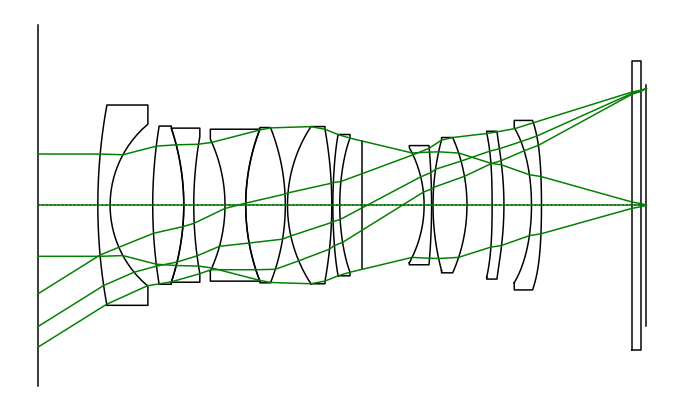

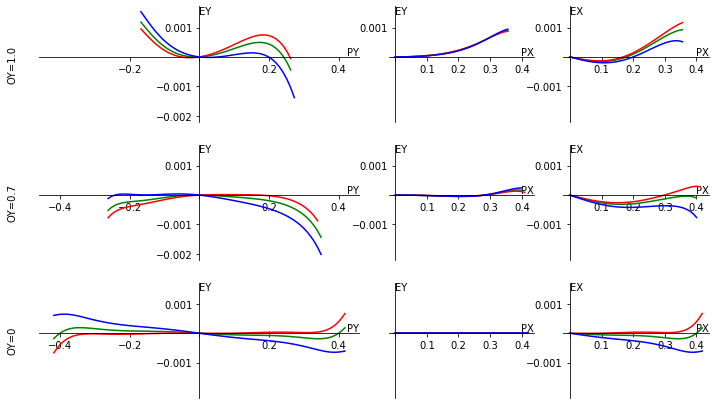

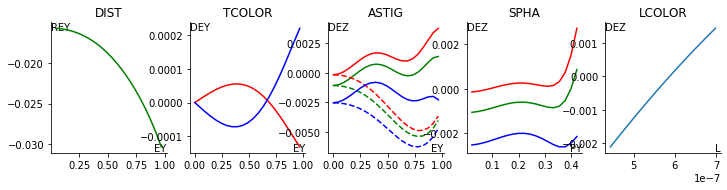

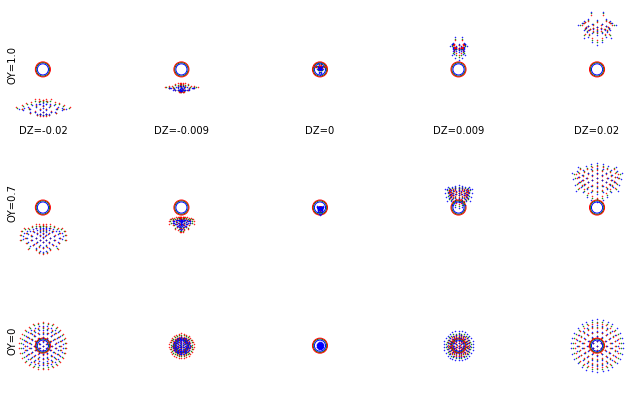

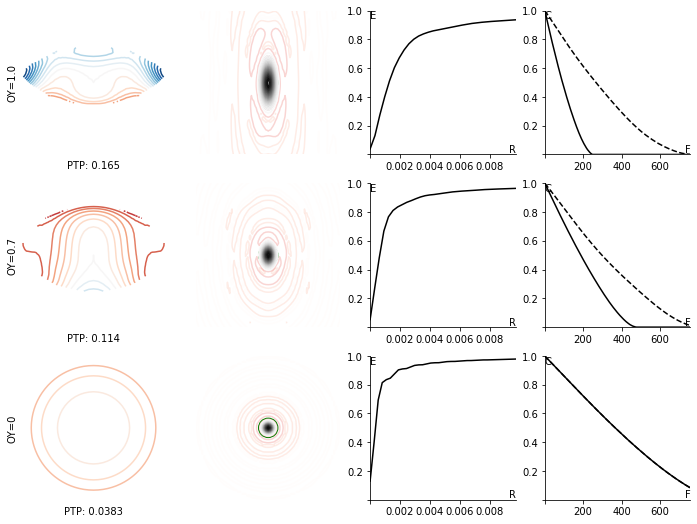

In [16]:
ro.Analysis(s)